In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv', index_col = 0)
test = pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e2/sample_submission.csv')

In [5]:
train.head(2)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0


In [36]:
test.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown


In [6]:
cols = train.columns
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [33]:
test = test.drop('id', axis = 1)

In [7]:
sample_submission.head(2)

,id,stroke
0,15304,0.041296
1,15305,0.041296


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


(array([14672.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   632.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

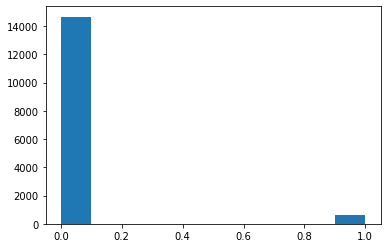

In [9]:
plt.hist(train['stroke'])

In [10]:
def extract(df, cols = cols):
    obj_col = []
    for col in cols:
        if df[col].dtype == 'object':
            obj_col.append(col)
    return obj_col

obj_cols = extract(train)
obj_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [11]:
for i in obj_cols:
    print(f'{i} -- {train[i].nunique()}')
    print(train[i].unique())
    print()

gender -- 3
['Male' 'Female' 'Other']

ever_married -- 2
['Yes' 'No']

work_type -- 5
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type -- 2
['Urban' 'Rural']

smoking_status -- 4
['never smoked' 'formerly smoked' 'Unknown' 'smokes']



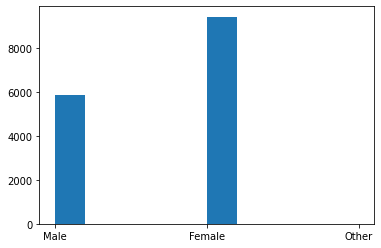

(array([6281.,    0.,    0., 2337.,    0.,    0., 4543.,    0.,    0.,
        2143.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

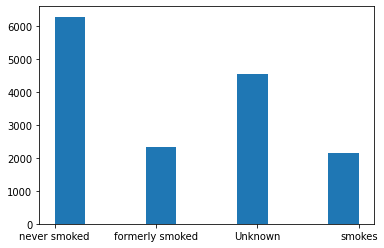

In [12]:
plt.hist(train['gender'])
plt.show()
plt.hist(train['smoking_status'])

In [13]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [14]:
gender = pd.DataFrame(encoder.fit_transform(train[['gender']]).toarray(), columns = ['Male', 'Female', 'Other'])
test_gender = pd.DataFrame(encoder.fit_transform(test[['gender']]).toarray(), columns = ['Male', 'Female', 'Other'])
marital_status = pd.DataFrame(encoder.fit_transform(train[['ever_married']]).toarray(), columns = ['Married', 'Not married'])
test_marital_status = pd.DataFrame(encoder.fit_transform(test[['ever_married']]).toarray(), columns = ['Married', 'Not married'])
work_type = pd.DataFrame(encoder.fit_transform(train[['work_type']]).toarray(), columns = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'])
test_work_type = pd.DataFrame(encoder.fit_transform(test[['work_type']]).toarray(), columns = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'])
residence_type = pd.DataFrame(encoder.fit_transform(train[['Residence_type']]).toarray(), columns = ['Urban', 'Rural'])
test_residence_type = pd.DataFrame(encoder.fit_transform(test[['Residence_type']]).toarray(), columns = ['Urban', 'Rural'])
smoking = pd.DataFrame(encoder.fit_transform(train[['smoking_status']]).toarray(), columns = ['never smoked', 'formerly smoked', 'Unknown', 'smokes'])
test_smoking = pd.DataFrame(encoder.fit_transform(test[['smoking_status']]).toarray(), columns = ['never smoked', 'formerly smoked', 'Unknown', 'smokes'])

In [34]:
training = train.join([gender, marital_status, work_type, residence_type, smoking]).drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
testing = test.join([gender, marital_status, work_type, residence_type, smoking]).drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)

In [16]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15304 entries, 0 to 15303
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                15304 non-null  float64
 1   hypertension       15304 non-null  int64  
 2   heart_disease      15304 non-null  int64  
 3   avg_glucose_level  15304 non-null  float64
 4   bmi                15304 non-null  float64
 5   stroke             15304 non-null  int64  
 6   Male               15304 non-null  float64
 7   Female             15304 non-null  float64
 8   Other              15304 non-null  float64
 9   Married            15304 non-null  float64
 10  Not married        15304 non-null  float64
 11  Private            15304 non-null  float64
 12  Self-employed      15304 non-null  float64
 13  Govt_job           15304 non-null  float64
 14  children           15304 non-null  float64
 15  Never_worked       15304 non-null  float64
 16  Urban              153

In [17]:
y = training.pop('smokes')
X = training

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
model = LogisticRegression(max_iter = 1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [28]:
pre = model.predict(X_test)

In [29]:
accuracy_score(pre, y_test)

1.0

In [37]:
prediction = model.predict(testing)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- smokes
Feature names seen at fit time, yet now missing:
- stroke

  warnings.warn(message, FutureWarning)


In [38]:
sample_submission['stroke'] = prediction

In [41]:
sample_submission.to_csv('submission1.csv', index = False)

In [42]:
sample_submission

,id,stroke
0,15304,0.0
1,15305,0.0
2,15306,1.0
3,15307,0.0
4,15308,0.0
...,...,...
10199,25503,0.0
10200,25504,0.0
10201,25505,0.0
10202,25506,0.0
